Датасет: https://www.kaggle.com/datasets/contactprad/bike-share-daily-data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alekseimedvedev","key":"e7e2e8ad9f177293686bb5c420c22c41"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d contactprad/bike-share-daily-data

  0% 0.00/284k [00:00<?, ?B/s]
100% 284k/284k [00:00<00:00, 74.0MB/s]


In [ ]:
! unzip  '/content/bike-share-daily-data.zip' -d '/content/bike-share-daily-data'

Archive:  /content/bike-share-daily-data.zip
  inflating: /content/bike-share-daily-data/bike_sharing_daily.csv  
  inflating: /content/bike-share-daily-data/bike_sharing_hourly.csv  


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/bike-share-daily-data/bike_sharing_hourly.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print(f"""Наименьшая дата - {df['dteday'].min()} 
Наибольшая дата - {df['dteday'].max()}
Количество дней - {len(df) / 24}""")

Наименьшая дата - 2011-01-01 
Наибольшая дата - 2012-12-31
Количество дней - 724.125


Целевой переменной является **cnt** -- количество арендованных велосипедов в час.

<Axes: xlabel='dteday'>

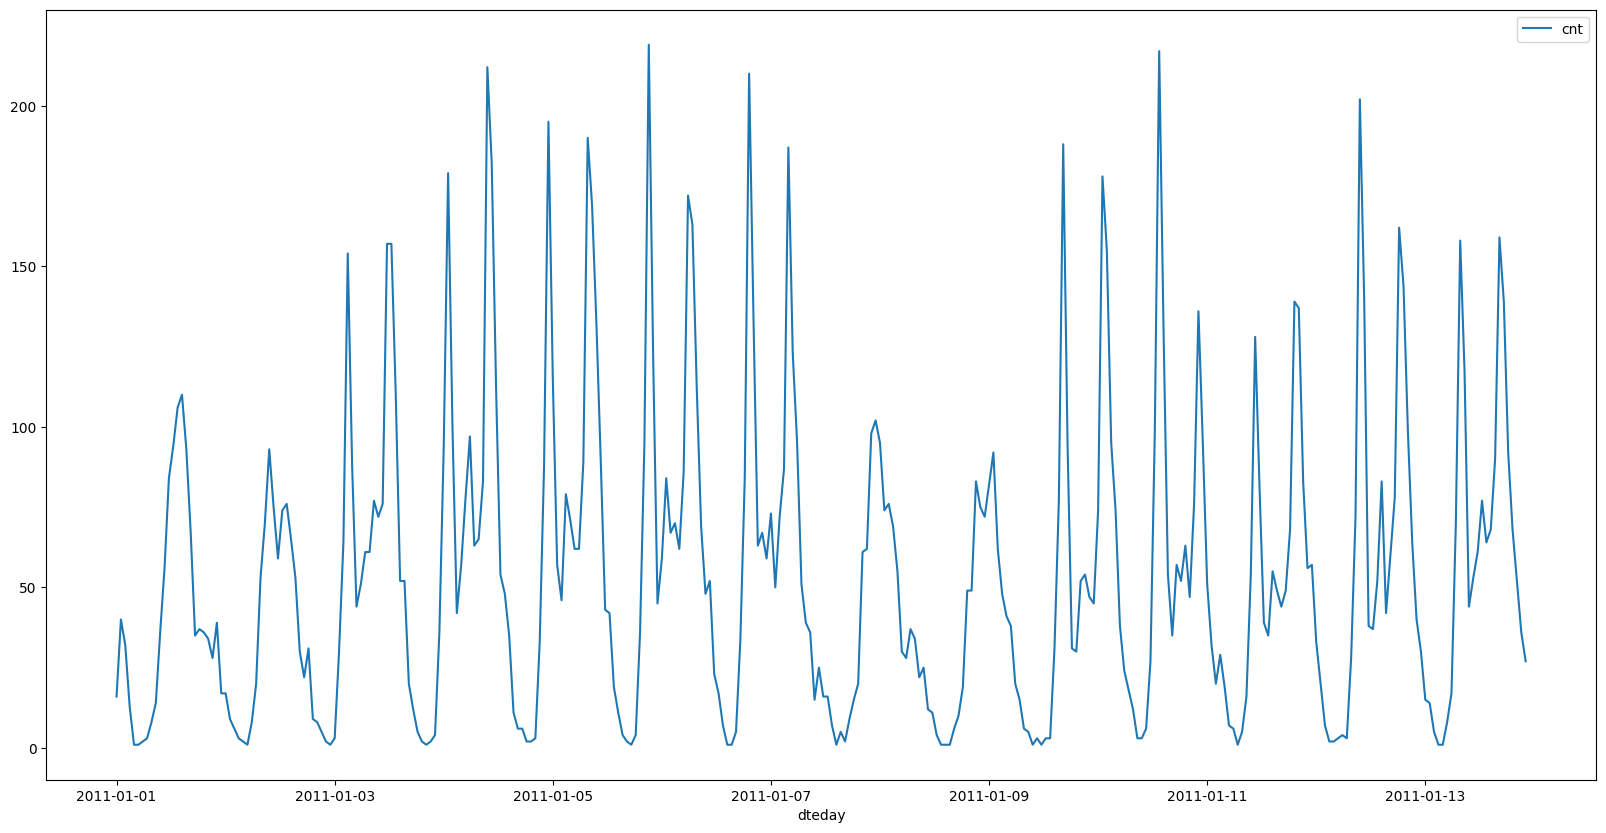

In [ ]:
df[df['dteday'].isin(df['dteday'].unique()[0:14])].plot(x='dteday', y='cnt', figsize=(20, 10))

Проведем стандартную преобработку данных. Категориальные признаки кодируем one-hot кодировкой, непрерывные -- нормируем.

In [ ]:
# Кодировка категориальных признаков
onehot_fields = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
for field in onehot_fields:
    dummies = pd.get_dummies(df[field], prefix=field, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
df = df.drop(onehot_fields, axis = 1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# Нормировка непрерывных признаков
continuous_fields = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Важно сохранить мат. ожидания и дисперсии, чтобы потом мы могли обратить нормировку
scaled_features = {}

for field in continuous_fields:
    mean, std = df[field].mean(), df[field].std()
    scaled_features[field] = [mean, std]
    df.loc[:, field] = (df[field] - mean)/std

In [ ]:
scaled_features

{'casual': [35.67621842453536, 49.30503038705308],
 'registered': [153.78686920996606, 151.35728591258314],
 'cnt': [189.46308763450142, 181.38759909186473],
 'temp': [0.4969871684216583, 0.1925561212497219],
 'hum': [0.6272288394038783, 0.19292983406291508],
 'windspeed': [0.1900976063064618, 0.12234022857279049]}

In [ ]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,-1.334609,0.2879,0.947345,-1.553844,-0.662736,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0,-1.438475,0.2727,0.895513,-1.553844,-0.561326,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0,-1.438475,0.2727,0.895513,-1.553844,-0.622172,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0,-1.334609,0.2879,0.636351,-1.553844,-0.662736,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0,-1.334609,0.2879,0.636351,-1.553844,-0.723582,...,0,0,0,0,0,1,1,0,0,0


Выкинем лишние данные, которые не будем использовать в обучении, предварительно сохранив копию датафрейма.

In [ ]:
df_backup = df.copy()

fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday']
df.drop(fields_to_drop, axis=1, inplace = True)
df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,1,1,0,0,0


Разделим множество на тренировочную, валидационную и тестовую выборки. Так как это временной ряд, то имеет смысл разделение сделать не случайно, а на временные промежутки (на прошлом учимся, будущее предсказываем).

In [ ]:
# тестовая выборка - последние 20 дней
test_data = df[-20*24:]
df = df[:-20*24]
# валидационная выборка - 30 дней до тестовой
val_data = df[-30*24:]
df = df[:-30*24]
# тренировочная выборка -- оставшиеся дни
train_data = df

print(f'''Длина тестовой выборки: {len(test_data)}
Длина валидационной выборки: {len(val_data)}
Длина тренировочной выборки: {len(train_data)}''')

Длина тестовой выборки: 480
Длина валидационной выборки: 720
Длина тренировочной выборки: 16179


In [ ]:
target_fields = ['cnt', 'casual', 'registered']
target=['cnt']
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target]

Создаем датасеты и загрузчики пакетов.

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cuda'

In [ ]:
train_features, train_targets = torch.Tensor(train_features.values).float(), torch.Tensor(train_targets.values).float() # переводим данные в тензор
val_features, val_targets = torch.Tensor(val_features.values).float(), torch.Tensor(val_targets.values).float()
test_features, test_targets = torch.Tensor(test_features.values).float(), torch.Tensor(test_targets.values).float()

In [ ]:
train_dataset=TensorDataset(train_features, train_targets)
val_dataset=TensorDataset(val_features, val_targets)
test_dataset=TensorDataset(test_features, test_targets)

In [ ]:
train_dataset[0]

(tensor([ 0.0000,  0.0000, -1.3346,  0.9473, -1.5538,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000]),
 tensor([-0.9563]))

In [ ]:
batch_size=32 # размер пакета

In [ ]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=False) # загрузчики данных
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

Задаем архитектуру модели

In [ ]:
class Bike_Reg(nn.Module):
    def __init__(self):
        super(Bike_Reg, self).__init__()
        self.fc1 = nn.Linear(56, 24)
        self.fc2 = nn.Linear(24, 16)
        self.fc3 = nn.Linear(16, 1)
        self.activation = nn.LeakyReLU(inplace=True)
    
    def forward(self, x):
        # 1-й слой
        x=self.fc1(x)
        x=self.activation(x)
        # 2-й слой
        x=self.fc2(x)
        x=self.activation(x)
        # финальный слой
        x=self.fc3(x)
        return x

In [ ]:
! pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

In [ ]:
model = Bike_Reg()
model.to(device)

Bike_Reg(
  (fc1): Linear(in_features=56, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.01, inplace=True)
)

In [ ]:
summary(model, input_size=(1,56)) # детализация модели

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Bike_Reg                                 [1, 1]                    --
├─Linear: 1-1                            [1, 24]                   1,368
├─LeakyReLU: 1-2                         [1, 24]                   --
├─Linear: 1-3                            [1, 16]                   400
├─LeakyReLU: 1-4                         [1, 16]                   --
├─Linear: 1-5                            [1, 1]                    17
Total params: 1,785
Trainable params: 1,785
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

Выбираем функцию ошибки и алгоритм оптимизации.

In [ ]:
criterion = nn.MSELoss(reduction='mean') # функция ошибки
optimizer=torch.optim.Adam(model.parameters()) # алгоритм оптимизации

Прописываем цикл обучения и валидации.

In [ ]:
from tqdm import tqdm

In [ ]:
train_losses=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss=0
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
  
  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))

In [ ]:
val_losses=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss=0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)
            running_loss += loss.item()
        val_loss=running_loss/len(val_loader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

Запускаем цикл обучения.

In [ ]:
max_epochs=200
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)


Epoch : 1


100%|██████████| 506/506 [00:01<00:00, 477.13it/s]


Ошибка обучения в эпохе: 0.3703

Epoch : 1


100%|██████████| 15/15 [00:00<00:00, 982.07it/s]


Ошибка валидации в эпохе: 0.0127:

Epoch : 2


100%|██████████| 506/506 [00:00<00:00, 589.58it/s]


Ошибка обучения в эпохе: 0.1876

Epoch : 2


100%|██████████| 15/15 [00:00<00:00, 1026.41it/s]


Ошибка валидации в эпохе: 0.0120:

Epoch : 3


100%|██████████| 506/506 [00:00<00:00, 518.87it/s]


Ошибка обучения в эпохе: 0.1198

Epoch : 3


100%|██████████| 15/15 [00:00<00:00, 985.63it/s]


Ошибка валидации в эпохе: 0.0111:

Epoch : 4


100%|██████████| 506/506 [00:01<00:00, 459.97it/s]


Ошибка обучения в эпохе: 0.1021

Epoch : 4


100%|██████████| 15/15 [00:00<00:00, 715.71it/s]


Ошибка валидации в эпохе: 0.0092:

Epoch : 5


100%|██████████| 506/506 [00:01<00:00, 267.30it/s]


Ошибка обучения в эпохе: 0.0916

Epoch : 5


100%|██████████| 15/15 [00:00<00:00, 792.32it/s]


Ошибка валидации в эпохе: 0.0081:

Epoch : 6


100%|██████████| 506/506 [00:01<00:00, 357.15it/s]


Ошибка обучения в эпохе: 0.0817

Epoch : 6


100%|██████████| 15/15 [00:00<00:00, 483.50it/s]


Ошибка валидации в эпохе: 0.0082:

Epoch : 7


100%|██████████| 506/506 [00:01<00:00, 352.55it/s]


Ошибка обучения в эпохе: 0.0741

Epoch : 7


100%|██████████| 15/15 [00:00<00:00, 676.20it/s]


Ошибка валидации в эпохе: 0.0077:

Epoch : 8


100%|██████████| 506/506 [00:01<00:00, 329.25it/s]


Ошибка обучения в эпохе: 0.0689

Epoch : 8


100%|██████████| 15/15 [00:00<00:00, 641.53it/s]


Ошибка валидации в эпохе: 0.0070:

Epoch : 9


100%|██████████| 506/506 [00:01<00:00, 347.08it/s]


Ошибка обучения в эпохе: 0.0654

Epoch : 9


100%|██████████| 15/15 [00:00<00:00, 851.97it/s]


Ошибка валидации в эпохе: 0.0064:

Epoch : 10


100%|██████████| 506/506 [00:01<00:00, 330.12it/s]


Ошибка обучения в эпохе: 0.0630

Epoch : 10


100%|██████████| 15/15 [00:00<00:00, 977.34it/s]


Ошибка валидации в эпохе: 0.0059:

Epoch : 11


100%|██████████| 506/506 [00:01<00:00, 390.23it/s]


Ошибка обучения в эпохе: 0.0610

Epoch : 11


100%|██████████| 15/15 [00:00<00:00, 963.47it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 12


100%|██████████| 506/506 [00:02<00:00, 186.30it/s]


Ошибка обучения в эпохе: 0.0595

Epoch : 12


100%|██████████| 15/15 [00:00<00:00, 643.02it/s]


Ошибка валидации в эпохе: 0.0054:

Epoch : 13


100%|██████████| 506/506 [00:01<00:00, 263.65it/s]


Ошибка обучения в эпохе: 0.0582

Epoch : 13


100%|██████████| 15/15 [00:00<00:00, 668.95it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 14


100%|██████████| 506/506 [00:01<00:00, 298.22it/s]


Ошибка обучения в эпохе: 0.0571

Epoch : 14


100%|██████████| 15/15 [00:00<00:00, 1382.10it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 15


100%|██████████| 506/506 [00:00<00:00, 606.34it/s]


Ошибка обучения в эпохе: 0.0563

Epoch : 15


100%|██████████| 15/15 [00:00<00:00, 1391.79it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 16


100%|██████████| 506/506 [00:00<00:00, 638.70it/s]


Ошибка обучения в эпохе: 0.0555

Epoch : 16


100%|██████████| 15/15 [00:00<00:00, 1137.88it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 17


100%|██████████| 506/506 [00:00<00:00, 615.13it/s]


Ошибка обучения в эпохе: 0.0547

Epoch : 17


100%|██████████| 15/15 [00:00<00:00, 1178.59it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 18


100%|██████████| 506/506 [00:00<00:00, 628.20it/s]


Ошибка обучения в эпохе: 0.0540

Epoch : 18


100%|██████████| 15/15 [00:00<00:00, 1255.96it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 19


100%|██████████| 506/506 [00:00<00:00, 612.70it/s]


Ошибка обучения в эпохе: 0.0533

Epoch : 19


100%|██████████| 15/15 [00:00<00:00, 1019.27it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 20


100%|██████████| 506/506 [00:00<00:00, 595.10it/s]


Ошибка обучения в эпохе: 0.0527

Epoch : 20


100%|██████████| 15/15 [00:00<00:00, 1608.74it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 21


100%|██████████| 506/506 [00:00<00:00, 607.02it/s]


Ошибка обучения в эпохе: 0.0521

Epoch : 21


100%|██████████| 15/15 [00:00<00:00, 1614.31it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 22


100%|██████████| 506/506 [00:00<00:00, 550.23it/s]


Ошибка обучения в эпохе: 0.0517

Epoch : 22


100%|██████████| 15/15 [00:00<00:00, 969.69it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 23


100%|██████████| 506/506 [00:01<00:00, 462.66it/s]


Ошибка обучения в эпохе: 0.0513

Epoch : 23


100%|██████████| 15/15 [00:00<00:00, 1005.52it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 24


100%|██████████| 506/506 [00:01<00:00, 505.86it/s]


Ошибка обучения в эпохе: 0.0508

Epoch : 24


100%|██████████| 15/15 [00:00<00:00, 1335.26it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 25


100%|██████████| 506/506 [00:00<00:00, 616.70it/s]


Ошибка обучения в эпохе: 0.0505

Epoch : 25


100%|██████████| 15/15 [00:00<00:00, 956.93it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 26


100%|██████████| 506/506 [00:00<00:00, 607.30it/s]


Ошибка обучения в эпохе: 0.0502

Epoch : 26


100%|██████████| 15/15 [00:00<00:00, 1425.02it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 27


100%|██████████| 506/506 [00:00<00:00, 610.55it/s]


Ошибка обучения в эпохе: 0.0499

Epoch : 27


100%|██████████| 15/15 [00:00<00:00, 1462.11it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 28


100%|██████████| 506/506 [00:00<00:00, 610.32it/s]


Ошибка обучения в эпохе: 0.0497

Epoch : 28


100%|██████████| 15/15 [00:00<00:00, 1367.47it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 29


100%|██████████| 506/506 [00:00<00:00, 590.96it/s]


Ошибка обучения в эпохе: 0.0495

Epoch : 29


100%|██████████| 15/15 [00:00<00:00, 1092.63it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 30


100%|██████████| 506/506 [00:00<00:00, 605.21it/s]


Ошибка обучения в эпохе: 0.0492

Epoch : 30


100%|██████████| 15/15 [00:00<00:00, 1433.26it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 31


100%|██████████| 506/506 [00:00<00:00, 612.80it/s]


Ошибка обучения в эпохе: 0.0490

Epoch : 31


100%|██████████| 15/15 [00:00<00:00, 1406.26it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 32


100%|██████████| 506/506 [00:00<00:00, 615.37it/s]


Ошибка обучения в эпохе: 0.0488

Epoch : 32


100%|██████████| 15/15 [00:00<00:00, 1470.07it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 33


100%|██████████| 506/506 [00:00<00:00, 616.78it/s]


Ошибка обучения в эпохе: 0.0486

Epoch : 33


100%|██████████| 15/15 [00:00<00:00, 1500.22it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 34


100%|██████████| 506/506 [00:00<00:00, 610.49it/s]


Ошибка обучения в эпохе: 0.0485

Epoch : 34


100%|██████████| 15/15 [00:00<00:00, 1203.30it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 35


100%|██████████| 506/506 [00:00<00:00, 610.10it/s]


Ошибка обучения в эпохе: 0.0483

Epoch : 35


100%|██████████| 15/15 [00:00<00:00, 1261.72it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 36


100%|██████████| 506/506 [00:01<00:00, 500.93it/s]


Ошибка обучения в эпохе: 0.0481

Epoch : 36


100%|██████████| 15/15 [00:00<00:00, 903.52it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 37


100%|██████████| 506/506 [00:01<00:00, 466.76it/s]


Ошибка обучения в эпохе: 0.0481

Epoch : 37


100%|██████████| 15/15 [00:00<00:00, 743.47it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 38


100%|██████████| 506/506 [00:00<00:00, 522.76it/s]


Ошибка обучения в эпохе: 0.0480

Epoch : 38


100%|██████████| 15/15 [00:00<00:00, 1321.73it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 39


100%|██████████| 506/506 [00:00<00:00, 614.54it/s]


Ошибка обучения в эпохе: 0.0479

Epoch : 39


100%|██████████| 15/15 [00:00<00:00, 1356.56it/s]


Ошибка валидации в эпохе: 0.0048:

Epoch : 40


100%|██████████| 506/506 [00:00<00:00, 603.96it/s]


Ошибка обучения в эпохе: 0.0479

Epoch : 40


100%|██████████| 15/15 [00:00<00:00, 1507.22it/s]


Ошибка валидации в эпохе: 0.0048:

Epoch : 41


100%|██████████| 506/506 [00:00<00:00, 611.74it/s]


Ошибка обучения в эпохе: 0.0479

Epoch : 41


100%|██████████| 15/15 [00:00<00:00, 1235.87it/s]


Ошибка валидации в эпохе: 0.0048:

Epoch : 42


100%|██████████| 506/506 [00:00<00:00, 578.17it/s]


Ошибка обучения в эпохе: 0.0480

Epoch : 42


100%|██████████| 15/15 [00:00<00:00, 1389.64it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 43


100%|██████████| 506/506 [00:00<00:00, 549.08it/s]


Ошибка обучения в эпохе: 0.0481

Epoch : 43


100%|██████████| 15/15 [00:00<00:00, 1251.01it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 44


100%|██████████| 506/506 [00:00<00:00, 618.50it/s]


Ошибка обучения в эпохе: 0.0482

Epoch : 44


100%|██████████| 15/15 [00:00<00:00, 1014.19it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 45


100%|██████████| 506/506 [00:00<00:00, 619.19it/s]


Ошибка обучения в эпохе: 0.0485

Epoch : 45


100%|██████████| 15/15 [00:00<00:00, 1268.69it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 46


100%|██████████| 506/506 [00:00<00:00, 621.25it/s]


Ошибка обучения в эпохе: 0.0488

Epoch : 46


100%|██████████| 15/15 [00:00<00:00, 1039.50it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 47


100%|██████████| 506/506 [00:00<00:00, 612.50it/s]


Ошибка обучения в эпохе: 0.0492

Epoch : 47


100%|██████████| 15/15 [00:00<00:00, 1456.76it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 48


100%|██████████| 506/506 [00:00<00:00, 611.42it/s]


Ошибка обучения в эпохе: 0.0497

Epoch : 48


100%|██████████| 15/15 [00:00<00:00, 1251.66it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 49


100%|██████████| 506/506 [00:00<00:00, 550.94it/s]


Ошибка обучения в эпохе: 0.0503

Epoch : 49


100%|██████████| 15/15 [00:00<00:00, 776.59it/s]


Ошибка валидации в эпохе: 0.0054:

Epoch : 50


100%|██████████| 506/506 [00:01<00:00, 471.09it/s]


Ошибка обучения в эпохе: 0.0506

Epoch : 50


100%|██████████| 15/15 [00:00<00:00, 1123.07it/s]


Ошибка валидации в эпохе: 0.0055:

Epoch : 51


100%|██████████| 506/506 [00:01<00:00, 468.60it/s]


Ошибка обучения в эпохе: 0.0511

Epoch : 51


100%|██████████| 15/15 [00:00<00:00, 903.98it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 52


100%|██████████| 506/506 [00:00<00:00, 607.69it/s]


Ошибка обучения в эпохе: 0.0512

Epoch : 52


100%|██████████| 15/15 [00:00<00:00, 1074.31it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 53


100%|██████████| 506/506 [00:00<00:00, 605.56it/s]


Ошибка обучения в эпохе: 0.0514

Epoch : 53


100%|██████████| 15/15 [00:00<00:00, 1470.58it/s]


Ошибка валидации в эпохе: 0.0057:

Epoch : 54


100%|██████████| 506/506 [00:00<00:00, 614.20it/s]


Ошибка обучения в эпохе: 0.0515

Epoch : 54


100%|██████████| 15/15 [00:00<00:00, 1105.18it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 55


100%|██████████| 506/506 [00:00<00:00, 592.97it/s]


Ошибка обучения в эпохе: 0.0514

Epoch : 55


100%|██████████| 15/15 [00:00<00:00, 1365.69it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 56


100%|██████████| 506/506 [00:00<00:00, 582.38it/s]


Ошибка обучения в эпохе: 0.0513

Epoch : 56


100%|██████████| 15/15 [00:00<00:00, 1015.37it/s]


Ошибка валидации в эпохе: 0.0056:

Epoch : 57


100%|██████████| 506/506 [00:00<00:00, 592.52it/s]


Ошибка обучения в эпохе: 0.0512

Epoch : 57


100%|██████████| 15/15 [00:00<00:00, 1343.47it/s]


Ошибка валидации в эпохе: 0.0055:

Epoch : 58


100%|██████████| 506/506 [00:00<00:00, 593.95it/s]


Ошибка обучения в эпохе: 0.0510

Epoch : 58


100%|██████████| 15/15 [00:00<00:00, 1398.23it/s]


Ошибка валидации в эпохе: 0.0054:

Epoch : 59


100%|██████████| 506/506 [00:00<00:00, 596.77it/s]


Ошибка обучения в эпохе: 0.0508

Epoch : 59


100%|██████████| 15/15 [00:00<00:00, 1448.71it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 60


100%|██████████| 506/506 [00:00<00:00, 589.93it/s]


Ошибка обучения в эпохе: 0.0505

Epoch : 60


100%|██████████| 15/15 [00:00<00:00, 1357.50it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 61


100%|██████████| 506/506 [00:00<00:00, 590.22it/s]


Ошибка обучения в эпохе: 0.0502

Epoch : 61


100%|██████████| 15/15 [00:00<00:00, 1603.37it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 62


100%|██████████| 506/506 [00:00<00:00, 594.29it/s]


Ошибка обучения в эпохе: 0.0499

Epoch : 62


100%|██████████| 15/15 [00:00<00:00, 1520.74it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 63


100%|██████████| 506/506 [00:01<00:00, 476.56it/s]


Ошибка обучения в эпохе: 0.0496

Epoch : 63


100%|██████████| 15/15 [00:00<00:00, 903.93it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 64


100%|██████████| 506/506 [00:01<00:00, 471.00it/s]


Ошибка обучения в эпохе: 0.0493

Epoch : 64


100%|██████████| 15/15 [00:00<00:00, 1046.31it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 65


100%|██████████| 506/506 [00:00<00:00, 538.41it/s]


Ошибка обучения в эпохе: 0.0490

Epoch : 65


100%|██████████| 15/15 [00:00<00:00, 1103.20it/s]


Ошибка валидации в эпохе: 0.0053:

Epoch : 66


100%|██████████| 506/506 [00:00<00:00, 578.30it/s]


Ошибка обучения в эпохе: 0.0487

Epoch : 66


100%|██████████| 15/15 [00:00<00:00, 1247.93it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 67


100%|██████████| 506/506 [00:00<00:00, 598.62it/s]


Ошибка обучения в эпохе: 0.0485

Epoch : 67


100%|██████████| 15/15 [00:00<00:00, 1565.78it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 68


100%|██████████| 506/506 [00:00<00:00, 605.27it/s]


Ошибка обучения в эпохе: 0.0482

Epoch : 68


100%|██████████| 15/15 [00:00<00:00, 1404.47it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 69


100%|██████████| 506/506 [00:00<00:00, 594.61it/s]


Ошибка обучения в эпохе: 0.0480

Epoch : 69


100%|██████████| 15/15 [00:00<00:00, 955.52it/s]


Ошибка валидации в эпохе: 0.0052:

Epoch : 70


100%|██████████| 506/506 [00:00<00:00, 597.11it/s]


Ошибка обучения в эпохе: 0.0477

Epoch : 70


100%|██████████| 15/15 [00:00<00:00, 1396.52it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 71


100%|██████████| 506/506 [00:00<00:00, 616.74it/s]


Ошибка обучения в эпохе: 0.0474

Epoch : 71


100%|██████████| 15/15 [00:00<00:00, 919.60it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 72


100%|██████████| 506/506 [00:00<00:00, 616.39it/s]


Ошибка обучения в эпохе: 0.0472

Epoch : 72


100%|██████████| 15/15 [00:00<00:00, 1181.43it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 73


100%|██████████| 506/506 [00:00<00:00, 600.65it/s]


Ошибка обучения в эпохе: 0.0470

Epoch : 73


100%|██████████| 15/15 [00:00<00:00, 1437.26it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 74


100%|██████████| 506/506 [00:00<00:00, 583.49it/s]


Ошибка обучения в эпохе: 0.0468

Epoch : 74


100%|██████████| 15/15 [00:00<00:00, 1441.44it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 75


100%|██████████| 506/506 [00:00<00:00, 593.49it/s]


Ошибка обучения в эпохе: 0.0466

Epoch : 75


100%|██████████| 15/15 [00:00<00:00, 1640.02it/s]


Ошибка валидации в эпохе: 0.0051:

Epoch : 76


100%|██████████| 506/506 [00:00<00:00, 553.05it/s]


Ошибка обучения в эпохе: 0.0464

Epoch : 76


100%|██████████| 15/15 [00:00<00:00, 830.73it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 77


100%|██████████| 506/506 [00:01<00:00, 463.31it/s]


Ошибка обучения в эпохе: 0.0462

Epoch : 77


100%|██████████| 15/15 [00:00<00:00, 1063.84it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 78


100%|██████████| 506/506 [00:01<00:00, 463.93it/s]


Ошибка обучения в эпохе: 0.0461

Epoch : 78


100%|██████████| 15/15 [00:00<00:00, 1022.12it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 79


100%|██████████| 506/506 [00:00<00:00, 594.65it/s]


Ошибка обучения в эпохе: 0.0459

Epoch : 79


100%|██████████| 15/15 [00:00<00:00, 1310.01it/s]


Ошибка валидации в эпохе: 0.0050:

Epoch : 80


100%|██████████| 506/506 [00:00<00:00, 597.89it/s]


Ошибка обучения в эпохе: 0.0457

Epoch : 80


100%|██████████| 15/15 [00:00<00:00, 1676.87it/s]


Ошибка валидации в эпохе: 0.0049:

Epoch : 81


100%|██████████| 506/506 [00:00<00:00, 595.14it/s]


Ошибка обучения в эпохе: 0.0456

Epoch : 81


100%|██████████| 15/15 [00:00<00:00, 1329.89it/s]


Ошибка валидации в эпохе: 0.0048:

Epoch : 82


100%|██████████| 506/506 [00:00<00:00, 587.23it/s]


Ошибка обучения в эпохе: 0.0453

Epoch : 82


100%|██████████| 15/15 [00:00<00:00, 1406.86it/s]


Ошибка валидации в эпохе: 0.0048:

Epoch : 83


100%|██████████| 506/506 [00:00<00:00, 602.22it/s]


Ошибка обучения в эпохе: 0.0452

Epoch : 83


100%|██████████| 15/15 [00:00<00:00, 1540.78it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 84


100%|██████████| 506/506 [00:00<00:00, 585.80it/s]


Ошибка обучения в эпохе: 0.0450

Epoch : 84


100%|██████████| 15/15 [00:00<00:00, 1658.79it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 85


100%|██████████| 506/506 [00:00<00:00, 589.12it/s]


Ошибка обучения в эпохе: 0.0449

Epoch : 85


100%|██████████| 15/15 [00:00<00:00, 1345.33it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 86


100%|██████████| 506/506 [00:00<00:00, 599.14it/s]


Ошибка обучения в эпохе: 0.0447

Epoch : 86


100%|██████████| 15/15 [00:00<00:00, 1120.75it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 87


100%|██████████| 506/506 [00:00<00:00, 600.80it/s]


Ошибка обучения в эпохе: 0.0445

Epoch : 87


100%|██████████| 15/15 [00:00<00:00, 1653.08it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 88


100%|██████████| 506/506 [00:00<00:00, 598.26it/s]


Ошибка обучения в эпохе: 0.0444

Epoch : 88


100%|██████████| 15/15 [00:00<00:00, 1431.47it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 89


100%|██████████| 506/506 [00:00<00:00, 591.65it/s]


Ошибка обучения в эпохе: 0.0444

Epoch : 89


100%|██████████| 15/15 [00:00<00:00, 1350.24it/s]


Ошибка валидации в эпохе: 0.0047:

Epoch : 90


100%|██████████| 506/506 [00:01<00:00, 484.57it/s]


Ошибка обучения в эпохе: 0.0442

Epoch : 90


100%|██████████| 15/15 [00:00<00:00, 962.57it/s]


Ошибка валидации в эпохе: 0.0046:

Epoch : 91


100%|██████████| 506/506 [00:01<00:00, 454.11it/s]


Ошибка обучения в эпохе: 0.0441

Epoch : 91


100%|██████████| 15/15 [00:00<00:00, 903.94it/s]


Ошибка валидации в эпохе: 0.0046:

Epoch : 92


100%|██████████| 506/506 [00:00<00:00, 532.12it/s]


Ошибка обучения в эпохе: 0.0440

Epoch : 92


100%|██████████| 15/15 [00:00<00:00, 1453.53it/s]


Ошибка валидации в эпохе: 0.0046:

Epoch : 93


100%|██████████| 506/506 [00:00<00:00, 593.91it/s]


Ошибка обучения в эпохе: 0.0438

Epoch : 93


100%|██████████| 15/15 [00:00<00:00, 1460.92it/s]


Ошибка валидации в эпохе: 0.0046:

Epoch : 94


100%|██████████| 506/506 [00:01<00:00, 402.73it/s]


Ошибка обучения в эпохе: 0.0438

Epoch : 94


100%|██████████| 15/15 [00:00<00:00, 903.15it/s]


Ошибка валидации в эпохе: 0.0046:

Epoch : 95


100%|██████████| 506/506 [00:01<00:00, 424.55it/s]


Ошибка обучения в эпохе: 0.0437

Epoch : 95


100%|██████████| 15/15 [00:00<00:00, 1230.92it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 96


100%|██████████| 506/506 [00:01<00:00, 423.00it/s]


Ошибка обучения в эпохе: 0.0435

Epoch : 96


100%|██████████| 15/15 [00:00<00:00, 932.00it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 97


100%|██████████| 506/506 [00:00<00:00, 606.38it/s]


Ошибка обучения в эпохе: 0.0435

Epoch : 97


100%|██████████| 15/15 [00:00<00:00, 1141.47it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 98


100%|██████████| 506/506 [00:00<00:00, 613.69it/s]


Ошибка обучения в эпохе: 0.0434

Epoch : 98


100%|██████████| 15/15 [00:00<00:00, 1506.61it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 99


100%|██████████| 506/506 [00:00<00:00, 598.49it/s]


Ошибка обучения в эпохе: 0.0434

Epoch : 99


100%|██████████| 15/15 [00:00<00:00, 1511.17it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 100


100%|██████████| 506/506 [00:00<00:00, 576.50it/s]


Ошибка обучения в эпохе: 0.0433

Epoch : 100


100%|██████████| 15/15 [00:00<00:00, 1155.54it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 101


100%|██████████| 506/506 [00:00<00:00, 591.46it/s]


Ошибка обучения в эпохе: 0.0432

Epoch : 101


100%|██████████| 15/15 [00:00<00:00, 1544.14it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 102


100%|██████████| 506/506 [00:01<00:00, 482.96it/s]


Ошибка обучения в эпохе: 0.0431

Epoch : 102


100%|██████████| 15/15 [00:00<00:00, 826.68it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 103


100%|██████████| 506/506 [00:01<00:00, 460.57it/s]


Ошибка обучения в эпохе: 0.0430

Epoch : 103


100%|██████████| 15/15 [00:00<00:00, 808.96it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 104


100%|██████████| 506/506 [00:00<00:00, 515.30it/s]


Ошибка обучения в эпохе: 0.0429

Epoch : 104


100%|██████████| 15/15 [00:00<00:00, 1021.61it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 105


100%|██████████| 506/506 [00:00<00:00, 590.89it/s]


Ошибка обучения в эпохе: 0.0429

Epoch : 105


100%|██████████| 15/15 [00:00<00:00, 1475.52it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 106


100%|██████████| 506/506 [00:00<00:00, 584.05it/s]


Ошибка обучения в эпохе: 0.0428

Epoch : 106


100%|██████████| 15/15 [00:00<00:00, 1328.07it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 107


100%|██████████| 506/506 [00:00<00:00, 588.88it/s]


Ошибка обучения в эпохе: 0.0428

Epoch : 107


100%|██████████| 15/15 [00:00<00:00, 1537.09it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 108


100%|██████████| 506/506 [00:00<00:00, 592.00it/s]


Ошибка обучения в эпохе: 0.0427

Epoch : 108


100%|██████████| 15/15 [00:00<00:00, 1364.45it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 109


100%|██████████| 506/506 [00:00<00:00, 586.61it/s]


Ошибка обучения в эпохе: 0.0426

Epoch : 109


100%|██████████| 15/15 [00:00<00:00, 1342.06it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 110


100%|██████████| 506/506 [00:00<00:00, 586.84it/s]


Ошибка обучения в эпохе: 0.0425

Epoch : 110


100%|██████████| 15/15 [00:00<00:00, 1655.56it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 111


100%|██████████| 506/506 [00:00<00:00, 595.20it/s]


Ошибка обучения в эпохе: 0.0424

Epoch : 111


100%|██████████| 15/15 [00:00<00:00, 1356.82it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 112


100%|██████████| 506/506 [00:00<00:00, 588.20it/s]


Ошибка обучения в эпохе: 0.0423

Epoch : 112


100%|██████████| 15/15 [00:00<00:00, 1429.55it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 113


100%|██████████| 506/506 [00:00<00:00, 598.71it/s]


Ошибка обучения в эпохе: 0.0423

Epoch : 113


100%|██████████| 15/15 [00:00<00:00, 1003.68it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 114


100%|██████████| 506/506 [00:00<00:00, 580.03it/s]


Ошибка обучения в эпохе: 0.0422

Epoch : 114


100%|██████████| 15/15 [00:00<00:00, 1248.18it/s]


Ошибка валидации в эпохе: 0.0045:

Epoch : 115


100%|██████████| 506/506 [00:00<00:00, 530.86it/s]


Ошибка обучения в эпохе: 0.0421

Epoch : 115


100%|██████████| 15/15 [00:00<00:00, 929.52it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 116


100%|██████████| 506/506 [00:01<00:00, 433.56it/s]


Ошибка обучения в эпохе: 0.0421

Epoch : 116


100%|██████████| 15/15 [00:00<00:00, 664.06it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 117


100%|██████████| 506/506 [00:01<00:00, 453.96it/s]


Ошибка обучения в эпохе: 0.0420

Epoch : 117


100%|██████████| 15/15 [00:00<00:00, 1615.02it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 118


100%|██████████| 506/506 [00:00<00:00, 582.49it/s]


Ошибка обучения в эпохе: 0.0419

Epoch : 118


100%|██████████| 15/15 [00:00<00:00, 1645.04it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 119


100%|██████████| 506/506 [00:00<00:00, 597.86it/s]


Ошибка обучения в эпохе: 0.0419

Epoch : 119


100%|██████████| 15/15 [00:00<00:00, 1275.56it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 120


100%|██████████| 506/506 [00:00<00:00, 602.53it/s]


Ошибка обучения в эпохе: 0.0417

Epoch : 120


100%|██████████| 15/15 [00:00<00:00, 1392.56it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 121


100%|██████████| 506/506 [00:00<00:00, 589.50it/s]


Ошибка обучения в эпохе: 0.0417

Epoch : 121


100%|██████████| 15/15 [00:00<00:00, 1529.99it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 122


100%|██████████| 506/506 [00:00<00:00, 596.99it/s]


Ошибка обучения в эпохе: 0.0416

Epoch : 122


100%|██████████| 15/15 [00:00<00:00, 1216.66it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 123


100%|██████████| 506/506 [00:00<00:00, 576.31it/s]


Ошибка обучения в эпохе: 0.0415

Epoch : 123


100%|██████████| 15/15 [00:00<00:00, 1058.05it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 124


100%|██████████| 506/506 [00:00<00:00, 583.42it/s]


Ошибка обучения в эпохе: 0.0414

Epoch : 124


100%|██████████| 15/15 [00:00<00:00, 1456.15it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 125


100%|██████████| 506/506 [00:00<00:00, 597.78it/s]


Ошибка обучения в эпохе: 0.0414

Epoch : 125


100%|██████████| 15/15 [00:00<00:00, 1491.82it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 126


100%|██████████| 506/506 [00:00<00:00, 578.24it/s]


Ошибка обучения в эпохе: 0.0413

Epoch : 126


100%|██████████| 15/15 [00:00<00:00, 1289.95it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 127


100%|██████████| 506/506 [00:00<00:00, 581.05it/s]


Ошибка обучения в эпохе: 0.0413

Epoch : 127


100%|██████████| 15/15 [00:00<00:00, 1371.46it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 128


100%|██████████| 506/506 [00:00<00:00, 592.25it/s]


Ошибка обучения в эпохе: 0.0412

Epoch : 128


100%|██████████| 15/15 [00:00<00:00, 1286.39it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 129


100%|██████████| 506/506 [00:01<00:00, 463.58it/s]


Ошибка обучения в эпохе: 0.0411

Epoch : 129


100%|██████████| 15/15 [00:00<00:00, 807.52it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 130


100%|██████████| 506/506 [00:01<00:00, 458.18it/s]


Ошибка обучения в эпохе: 0.0411

Epoch : 130


100%|██████████| 15/15 [00:00<00:00, 669.81it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 131


100%|██████████| 506/506 [00:00<00:00, 531.40it/s]


Ошибка обучения в эпохе: 0.0410

Epoch : 131


100%|██████████| 15/15 [00:00<00:00, 1448.04it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 132


100%|██████████| 506/506 [00:00<00:00, 598.08it/s]


Ошибка обучения в эпохе: 0.0410

Epoch : 132


100%|██████████| 15/15 [00:00<00:00, 1355.19it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 133


100%|██████████| 506/506 [00:00<00:00, 592.84it/s]


Ошибка обучения в эпохе: 0.0409

Epoch : 133


100%|██████████| 15/15 [00:00<00:00, 1122.57it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 134


100%|██████████| 506/506 [00:00<00:00, 602.02it/s]


Ошибка обучения в эпохе: 0.0408

Epoch : 134


100%|██████████| 15/15 [00:00<00:00, 1583.31it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 135


100%|██████████| 506/506 [00:00<00:00, 596.59it/s]


Ошибка обучения в эпохе: 0.0408

Epoch : 135


100%|██████████| 15/15 [00:00<00:00, 1330.46it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 136


100%|██████████| 506/506 [00:00<00:00, 570.71it/s]


Ошибка обучения в эпохе: 0.0407

Epoch : 136


100%|██████████| 15/15 [00:00<00:00, 1495.37it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 137


100%|██████████| 506/506 [00:00<00:00, 591.43it/s]


Ошибка обучения в эпохе: 0.0407

Epoch : 137


100%|██████████| 15/15 [00:00<00:00, 996.33it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 138


100%|██████████| 506/506 [00:00<00:00, 559.43it/s]


Ошибка обучения в эпохе: 0.0407

Epoch : 138


100%|██████████| 15/15 [00:00<00:00, 898.15it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 139


100%|██████████| 506/506 [00:00<00:00, 586.41it/s]


Ошибка обучения в эпохе: 0.0406

Epoch : 139


100%|██████████| 15/15 [00:00<00:00, 1459.53it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 140


100%|██████████| 506/506 [00:00<00:00, 583.31it/s]


Ошибка обучения в эпохе: 0.0405

Epoch : 140


100%|██████████| 15/15 [00:00<00:00, 1031.88it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 141


100%|██████████| 506/506 [00:00<00:00, 604.25it/s]


Ошибка обучения в эпохе: 0.0405

Epoch : 141


100%|██████████| 15/15 [00:00<00:00, 1102.66it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 142


100%|██████████| 506/506 [00:01<00:00, 489.73it/s]


Ошибка обучения в эпохе: 0.0404

Epoch : 142


100%|██████████| 15/15 [00:00<00:00, 965.44it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 143


100%|██████████| 506/506 [00:01<00:00, 463.38it/s]


Ошибка обучения в эпохе: 0.0403

Epoch : 143


100%|██████████| 15/15 [00:00<00:00, 1060.49it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 144


100%|██████████| 506/506 [00:01<00:00, 494.74it/s]


Ошибка обучения в эпохе: 0.0403

Epoch : 144


100%|██████████| 15/15 [00:00<00:00, 1002.41it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 145


100%|██████████| 506/506 [00:00<00:00, 602.44it/s]


Ошибка обучения в эпохе: 0.0402

Epoch : 145


100%|██████████| 15/15 [00:00<00:00, 1242.88it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 146


100%|██████████| 506/506 [00:00<00:00, 595.15it/s]


Ошибка обучения в эпохе: 0.0401

Epoch : 146


100%|██████████| 15/15 [00:00<00:00, 1090.56it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 147


100%|██████████| 506/506 [00:00<00:00, 603.31it/s]


Ошибка обучения в эпохе: 0.0401

Epoch : 147


100%|██████████| 15/15 [00:00<00:00, 1343.12it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 148


100%|██████████| 506/506 [00:00<00:00, 583.94it/s]


Ошибка обучения в эпохе: 0.0401

Epoch : 148


100%|██████████| 15/15 [00:00<00:00, 1429.58it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 149


100%|██████████| 506/506 [00:00<00:00, 568.67it/s]


Ошибка обучения в эпохе: 0.0400

Epoch : 149


100%|██████████| 15/15 [00:00<00:00, 1389.82it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 150


100%|██████████| 506/506 [00:00<00:00, 582.31it/s]


Ошибка обучения в эпохе: 0.0399

Epoch : 150


100%|██████████| 15/15 [00:00<00:00, 1422.12it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 151


100%|██████████| 506/506 [00:00<00:00, 592.44it/s]


Ошибка обучения в эпохе: 0.0399

Epoch : 151


100%|██████████| 15/15 [00:00<00:00, 1204.89it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 152


100%|██████████| 506/506 [00:00<00:00, 600.46it/s]


Ошибка обучения в эпохе: 0.0398

Epoch : 152


100%|██████████| 15/15 [00:00<00:00, 1419.36it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 153


100%|██████████| 506/506 [00:00<00:00, 588.42it/s]


Ошибка обучения в эпохе: 0.0397

Epoch : 153


100%|██████████| 15/15 [00:00<00:00, 1102.53it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 154


100%|██████████| 506/506 [00:00<00:00, 590.85it/s]


Ошибка обучения в эпохе: 0.0396

Epoch : 154


100%|██████████| 15/15 [00:00<00:00, 1395.87it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 155


100%|██████████| 506/506 [00:00<00:00, 583.87it/s]


Ошибка обучения в эпохе: 0.0395

Epoch : 155


100%|██████████| 15/15 [00:00<00:00, 839.12it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 156


100%|██████████| 506/506 [00:01<00:00, 443.34it/s]


Ошибка обучения в эпохе: 0.0395

Epoch : 156


100%|██████████| 15/15 [00:00<00:00, 1017.06it/s]


Ошибка валидации в эпохе: 0.0044:

Epoch : 157


100%|██████████| 506/506 [00:01<00:00, 458.39it/s]


Ошибка обучения в эпохе: 0.0395

Epoch : 157


100%|██████████| 15/15 [00:00<00:00, 914.43it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 158


100%|██████████| 506/506 [00:00<00:00, 555.57it/s]


Ошибка обучения в эпохе: 0.0394

Epoch : 158


100%|██████████| 15/15 [00:00<00:00, 1181.47it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 159


100%|██████████| 506/506 [00:00<00:00, 587.11it/s]


Ошибка обучения в эпохе: 0.0393

Epoch : 159


100%|██████████| 15/15 [00:00<00:00, 1284.29it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 160


100%|██████████| 506/506 [00:00<00:00, 576.25it/s]


Ошибка обучения в эпохе: 0.0392

Epoch : 160


100%|██████████| 15/15 [00:00<00:00, 1373.62it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 161


100%|██████████| 506/506 [00:00<00:00, 579.07it/s]


Ошибка обучения в эпохе: 0.0392

Epoch : 161


100%|██████████| 15/15 [00:00<00:00, 1435.72it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 162


100%|██████████| 506/506 [00:00<00:00, 574.06it/s]


Ошибка обучения в эпохе: 0.0391

Epoch : 162


100%|██████████| 15/15 [00:00<00:00, 1204.13it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 163


100%|██████████| 506/506 [00:00<00:00, 588.76it/s]


Ошибка обучения в эпохе: 0.0390

Epoch : 163


100%|██████████| 15/15 [00:00<00:00, 1371.29it/s]


Ошибка валидации в эпохе: 0.0043:

Epoch : 164


100%|██████████| 506/506 [00:00<00:00, 585.57it/s]


Ошибка обучения в эпохе: 0.0389

Epoch : 164


100%|██████████| 15/15 [00:00<00:00, 1358.67it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 165


100%|██████████| 506/506 [00:00<00:00, 591.99it/s]


Ошибка обучения в эпохе: 0.0388

Epoch : 165


100%|██████████| 15/15 [00:00<00:00, 1419.65it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 166


100%|██████████| 506/506 [00:00<00:00, 580.93it/s]


Ошибка обучения в эпохе: 0.0388

Epoch : 166


100%|██████████| 15/15 [00:00<00:00, 1341.15it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 167


100%|██████████| 506/506 [00:00<00:00, 583.89it/s]


Ошибка обучения в эпохе: 0.0387

Epoch : 167


100%|██████████| 15/15 [00:00<00:00, 1319.05it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 168


100%|██████████| 506/506 [00:00<00:00, 580.57it/s]


Ошибка обучения в эпохе: 0.0386

Epoch : 168


100%|██████████| 15/15 [00:00<00:00, 1285.97it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 169


100%|██████████| 506/506 [00:01<00:00, 486.67it/s]


Ошибка обучения в эпохе: 0.0385

Epoch : 169


100%|██████████| 15/15 [00:00<00:00, 816.96it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 170


100%|██████████| 506/506 [00:01<00:00, 458.48it/s]


Ошибка обучения в эпохе: 0.0384

Epoch : 170


100%|██████████| 15/15 [00:00<00:00, 867.05it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 171


100%|██████████| 506/506 [00:01<00:00, 469.55it/s]


Ошибка обучения в эпохе: 0.0384

Epoch : 171


100%|██████████| 15/15 [00:00<00:00, 1175.95it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 172


100%|██████████| 506/506 [00:00<00:00, 555.26it/s]


Ошибка обучения в эпохе: 0.0383

Epoch : 172


100%|██████████| 15/15 [00:00<00:00, 1017.26it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 173


100%|██████████| 506/506 [00:00<00:00, 598.37it/s]


Ошибка обучения в эпохе: 0.0383

Epoch : 173


100%|██████████| 15/15 [00:00<00:00, 1145.94it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 174


100%|██████████| 506/506 [00:00<00:00, 576.64it/s]


Ошибка обучения в эпохе: 0.0382

Epoch : 174


100%|██████████| 15/15 [00:00<00:00, 1434.41it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 175


100%|██████████| 506/506 [00:00<00:00, 603.44it/s]


Ошибка обучения в эпохе: 0.0381

Epoch : 175


100%|██████████| 15/15 [00:00<00:00, 1672.68it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 176


100%|██████████| 506/506 [00:00<00:00, 591.69it/s]


Ошибка обучения в эпохе: 0.0381

Epoch : 176


100%|██████████| 15/15 [00:00<00:00, 1347.64it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 177


100%|██████████| 506/506 [00:00<00:00, 582.04it/s]


Ошибка обучения в эпохе: 0.0380

Epoch : 177


100%|██████████| 15/15 [00:00<00:00, 1137.96it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 178


100%|██████████| 506/506 [00:00<00:00, 568.49it/s]


Ошибка обучения в эпохе: 0.0380

Epoch : 178


100%|██████████| 15/15 [00:00<00:00, 1055.29it/s]


Ошибка валидации в эпохе: 0.0040:

Epoch : 179


100%|██████████| 506/506 [00:00<00:00, 591.50it/s]


Ошибка обучения в эпохе: 0.0379

Epoch : 179


100%|██████████| 15/15 [00:00<00:00, 1271.05it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 180


100%|██████████| 506/506 [00:00<00:00, 561.00it/s]


Ошибка обучения в эпохе: 0.0379

Epoch : 180


100%|██████████| 15/15 [00:00<00:00, 1012.27it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 181


100%|██████████| 506/506 [00:00<00:00, 570.65it/s]


Ошибка обучения в эпохе: 0.0378

Epoch : 181


100%|██████████| 15/15 [00:00<00:00, 1317.22it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 182


100%|██████████| 506/506 [00:00<00:00, 515.22it/s]


Ошибка обучения в эпохе: 0.0378

Epoch : 182


100%|██████████| 15/15 [00:00<00:00, 816.28it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 183


100%|██████████| 506/506 [00:01<00:00, 454.42it/s]


Ошибка обучения в эпохе: 0.0377

Epoch : 183


100%|██████████| 15/15 [00:00<00:00, 698.30it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 184


100%|██████████| 506/506 [00:01<00:00, 464.25it/s]


Ошибка обучения в эпохе: 0.0376

Epoch : 184


100%|██████████| 15/15 [00:00<00:00, 1207.74it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 185


100%|██████████| 506/506 [00:00<00:00, 575.91it/s]


Ошибка обучения в эпохе: 0.0376

Epoch : 185


100%|██████████| 15/15 [00:00<00:00, 1627.68it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 186


100%|██████████| 506/506 [00:00<00:00, 576.41it/s]


Ошибка обучения в эпохе: 0.0375

Epoch : 186


100%|██████████| 15/15 [00:00<00:00, 1497.61it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 187


100%|██████████| 506/506 [00:00<00:00, 571.87it/s]


Ошибка обучения в эпохе: 0.0374

Epoch : 187


100%|██████████| 15/15 [00:00<00:00, 1365.57it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 188


100%|██████████| 506/506 [00:00<00:00, 566.68it/s]


Ошибка обучения в эпохе: 0.0374

Epoch : 188


100%|██████████| 15/15 [00:00<00:00, 881.34it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 189


100%|██████████| 506/506 [00:00<00:00, 578.15it/s]


Ошибка обучения в эпохе: 0.0373

Epoch : 189


100%|██████████| 15/15 [00:00<00:00, 1043.62it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 190


100%|██████████| 506/506 [00:00<00:00, 601.37it/s]


Ошибка обучения в эпохе: 0.0372

Epoch : 190


100%|██████████| 15/15 [00:00<00:00, 1244.58it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 191


100%|██████████| 506/506 [00:00<00:00, 596.73it/s]


Ошибка обучения в эпохе: 0.0372

Epoch : 191


100%|██████████| 15/15 [00:00<00:00, 1644.01it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 192


100%|██████████| 506/506 [00:00<00:00, 578.48it/s]


Ошибка обучения в эпохе: 0.0372

Epoch : 192


100%|██████████| 15/15 [00:00<00:00, 1566.68it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 193


100%|██████████| 506/506 [00:00<00:00, 578.04it/s]


Ошибка обучения в эпохе: 0.0371

Epoch : 193


100%|██████████| 15/15 [00:00<00:00, 1023.58it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 194


100%|██████████| 506/506 [00:00<00:00, 579.70it/s]


Ошибка обучения в эпохе: 0.0371

Epoch : 194


100%|██████████| 15/15 [00:00<00:00, 1618.46it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 195


100%|██████████| 506/506 [00:00<00:00, 556.47it/s]


Ошибка обучения в эпохе: 0.0370

Epoch : 195


100%|██████████| 15/15 [00:00<00:00, 719.86it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 196


100%|██████████| 506/506 [00:01<00:00, 432.36it/s]


Ошибка обучения в эпохе: 0.0370

Epoch : 196


100%|██████████| 15/15 [00:00<00:00, 863.32it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 197


100%|██████████| 506/506 [00:01<00:00, 450.89it/s]


Ошибка обучения в эпохе: 0.0369

Epoch : 197


100%|██████████| 15/15 [00:00<00:00, 1491.82it/s]


Ошибка валидации в эпохе: 0.0041:

Epoch : 198


100%|██████████| 506/506 [00:00<00:00, 578.32it/s]


Ошибка обучения в эпохе: 0.0369

Epoch : 198


100%|██████████| 15/15 [00:00<00:00, 1508.20it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 199


100%|██████████| 506/506 [00:00<00:00, 575.77it/s]


Ошибка обучения в эпохе: 0.0368

Epoch : 199


100%|██████████| 15/15 [00:00<00:00, 1029.08it/s]


Ошибка валидации в эпохе: 0.0042:

Epoch : 200


100%|██████████| 506/506 [00:00<00:00, 574.91it/s]


Ошибка обучения в эпохе: 0.0368

Epoch : 200


100%|██████████| 15/15 [00:00<00:00, 1068.20it/s]


Ошибка валидации в эпохе: 0.0040:


Выведем кривые обучения и валдации.

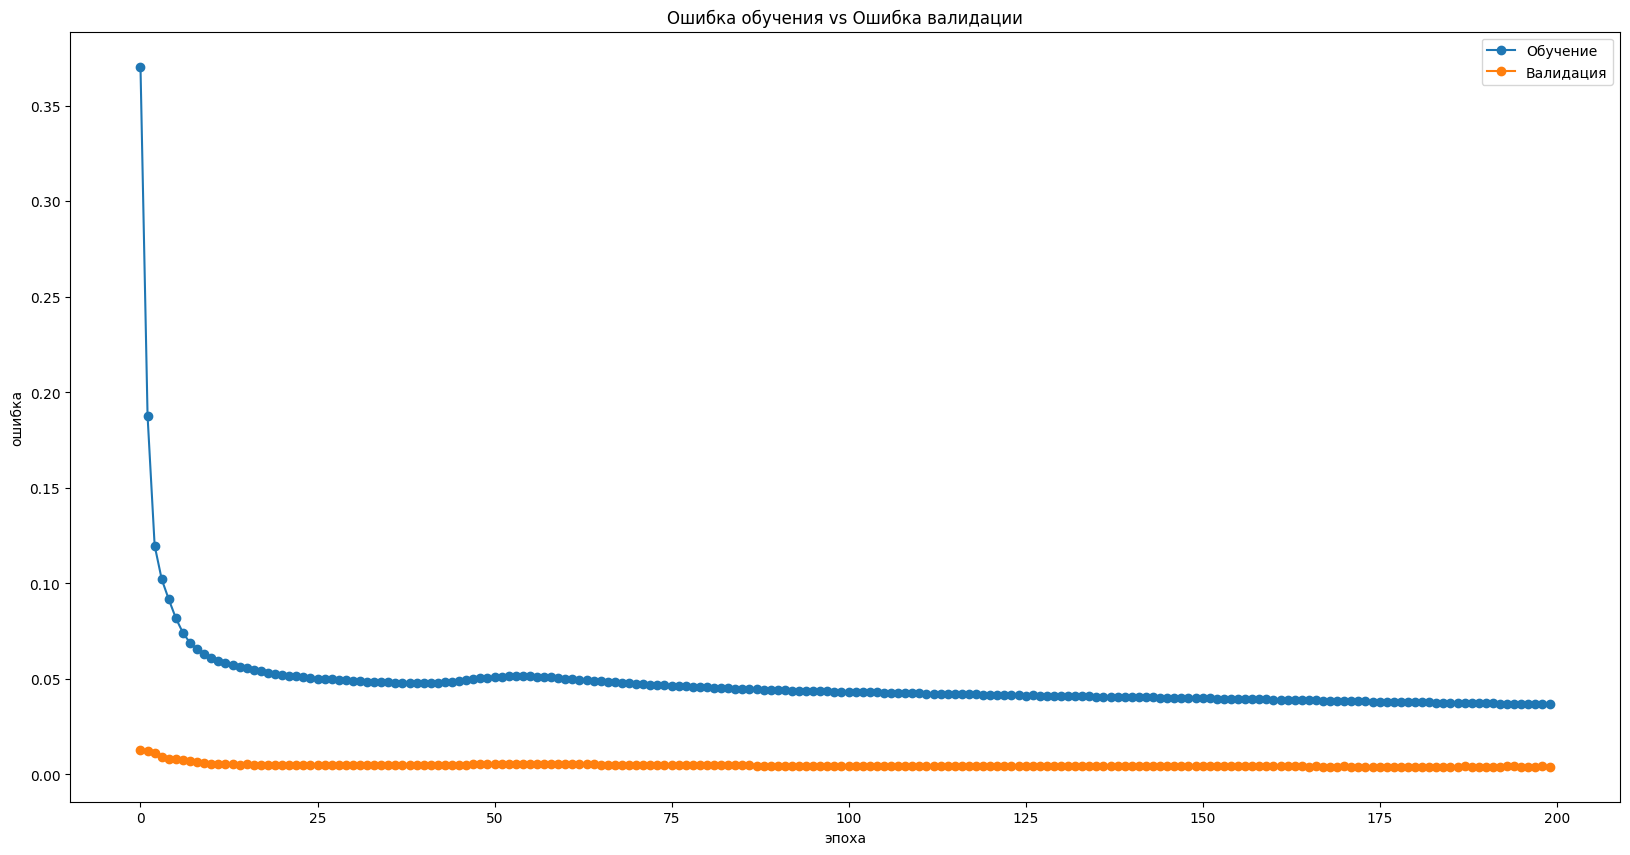

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

Выведем предсказания модели

In [ ]:
mean = scaled_features['cnt'][0]
std = scaled_features['cnt'][1]

In [ ]:
pred = []
target = []
for data in tqdm(test_loader):
  inputs, targets=data[0].to(device),data[1].to(device)
  outputs=model(inputs)
  pred.append(outputs.to('cpu').detach().numpy()* std + mean)
  target.append(targets.to('cpu').detach().numpy()* std + mean)

100%|██████████| 15/15 [00:00<00:00, 1100.64it/s]


In [ ]:
pred=np.array(pred).flatten()
target=np.array(target).flatten()

In [ ]:
# даты
datesx = list(df_backup[-21*24:]['dteday'])

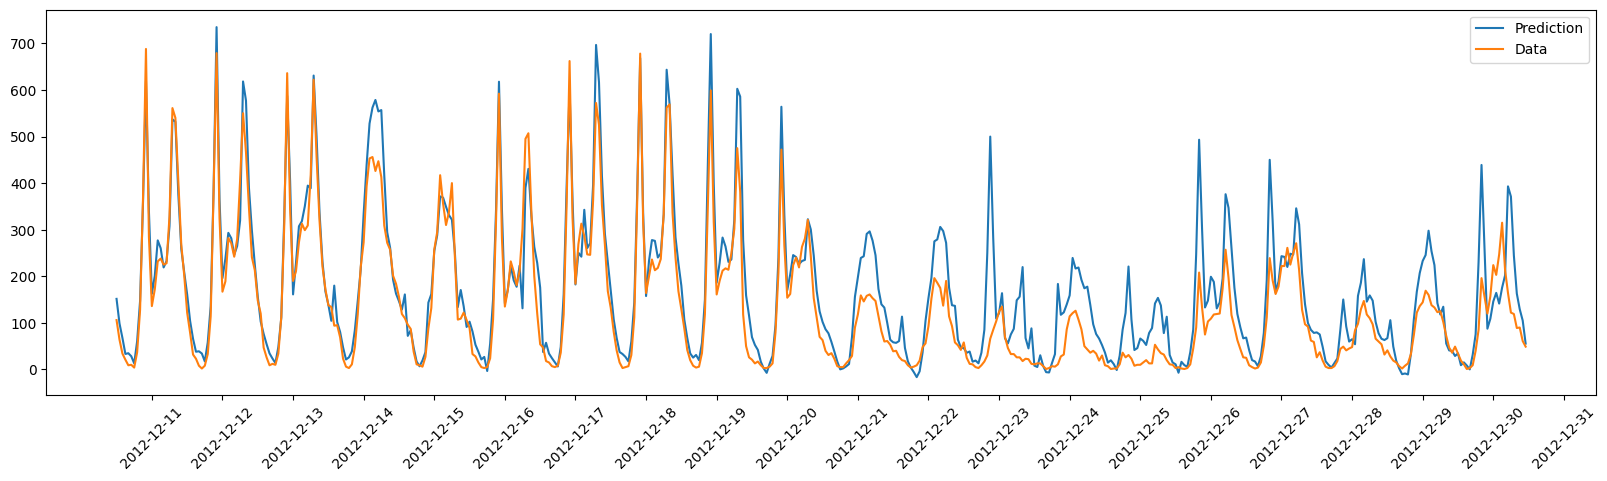

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(pred, label='Prediction')
ax.plot(target, label='Data')
ax.set_xticks(np.arange(len(datesx))[12::24])
ax.set_xticklabels(datesx[12::24], rotation=45)
ax.legend()